# **MACHINE LEARNING - PROJECT 3**

---



###### **Spoorthy K R**
###### **PES1UG19EC310**
###### Section 'E'




## **This project is one where you will implement K Means clustering from scratch and use it to perform image segmentation** 
The K Means Class in python should be written from scratch. Scikit Learn based KMeans
or OpenCV based Kmeans modules can be used for testing purposes only, i.e, to see how the output actually
should turn up to be.

##**Image segmentation and how it works**

Image segmentation is the classification of an image into different groups.Image segmentation is the process of partitioning a digital image into multiple distinct regions containing each pixel(sets of pixels, also known as superpixels) with similar attributes.The goal of Image segmentation is to change the representation of an image into something that is more meaningful and easier to analyze.

Image Segmentation involves converting an image into a collection of regions of pixels that are represented by a mask or a labeled image. By dividing an image into segments, you can process only the important segments of the image instead of processing the entire image.

##**K-Means clustering algorithm**

Clustering algorithms are unsupervised algorithms but are similar to Classification algorithms but the basis is different. K-Means clustering algorithm is an unsupervised algorithm and it is used to segment the interest area from the background. It clusters, or partitions the given data into K-clusters or parts based on the K-centroids.

The algorithm is used when you have unlabeled data(i.e. data without defined categories or groups). The goal is to find certain groups based on some kind of similarity in the data with the number of groups represented by K. The objective of K-Means clustering is to minimize the sum of squared distances between all points and the cluster center.

##**How it works**

1. Choose the number of clusters you want to find which is k.
2. Randomly assign the data points to any of the k clusters.
3. Then calculate the center of the clusters.
4. Calculate the distance of the data points from the centers of each of the clusters.
5. Depending on the distance of each data point from the cluster, reassign the data points to the nearest clusters.
6. Again calculate the new cluster center.
7. Repeat steps 4,5 and 6 till data points don’t change the clusters, or till we reach the assigned number of iterations.




Importing the necessary libraries




In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
 
%matplotlib inline
 
# Read in the image
image = cv2.imread('/content/drive/MyDrive/ball.jpg')
 
# Change color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
 
plt.imshow(image)

In [ ]:
# Reshaping the image into a 2D array of pixels and 3 color values (RGB)
pixel_vals = image.reshape((-1,3))
 
# Convert to float type
pixel_vals = np.float32(pixel_vals)

print(pixel_vals.shape)

Describing the functions in the KMeans class

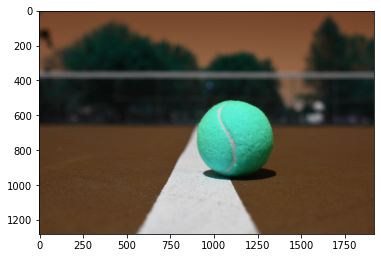

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))
class KMeans():
    def __init__(self, K=5, max_iters=100, plot_steps=False):
        self.K = K
        self.max_iters = max_iters
        self.plot_steps = plot_steps
        # list of sample indices for each cluster
        self.clusters = [[] for _ in range(self.K)]
        # the centers (mean feature vector) for each cluster
        self.centroids = []
    def predict(self, X):
        self.X = X
        self.n_samples, self.n_features = X.shape
        # initialize 
        random_sample_idxs = np.random.choice(self.n_samples, self.K, replace=False)
        self.centroids = [self.X[idx] for idx in random_sample_idxs]
        # Optimize clusters
        for _ in range(self.max_iters):
            # Assign samples to closest centroids (create clusters)
            print('1')
            self.clusters = self._create_clusters(self.centroids)
            if self.plot_steps:
                self.plot()
            # Calculate new centroids from the clusters
            centroids_old = self.centroids
            self.centroids = self._get_centroids(self.clusters)
            
            # check if clusters have changed
            if self._is_converged(centroids_old, self.centroids):
                break
            if self.plot_steps:
                self.plot()
        # Classify samples as the index of their clusters
        return self._get_cluster_labels(self.clusters)
    def _get_cluster_labels(self, clusters):
        # each sample will get the label of the cluster it was assigned to
        labels = np.empty(self.n_samples)
        for cluster_idx, cluster in enumerate(clusters):
            for sample_index in cluster:
                labels[sample_index] = cluster_idx
        return labels
    def _create_clusters(self, centroids):
        # Assign the samples to the closest centroids to create clusters
        clusters = [[] for _ in range(self.K)]
        for idx, sample in enumerate(self.X):
            centroid_idx = self._closest_centroid(sample, centroids)
            clusters[centroid_idx].append(idx)
        return clusters
    def _closest_centroid(self, sample, centroids):
        # distance of the current sample to each centroid
        distances = [euclidean_distance(sample, point) for point in centroids]
        closest_index = np.argmin(distances)
        return closest_index
    def _get_centroids(self, clusters):
        # assign mean value of clusters to centroids
        centroids = np.zeros((self.K, self.n_features))
        for cluster_idx, cluster in enumerate(clusters):
            cluster_mean = np.mean(self.X[cluster], axis=0)
            centroids[cluster_idx] = cluster_mean
        return centroids
    def _is_converged(self, centroids_old, centroids):
        # distances between each old and new centroids, fol all centroids
        distances = [euclidean_distance(centroids_old[i], centroids[i]) for i in range(self.K)]
        return sum(distances) == 0
    def plot(self):
        fig, ax = plt.subplots(figsize=(12, 8))
        for i, index in enumerate(self.clusters):
            point = self.X[index].T
            ax.scatter(*point)
        for point in self.centroids:
            ax.scatter(*point, marker="x", color='black', linewidth=2)
        plt.show()
    def cent(self):
        return self.centroids
import cv2
from google.colab.patches import cv2_imshow
image = cv2.imread("/content/drive/MyDrive/ball.jpg")
plt.figure(figsize=(6, 6))
plt.imshow(image)

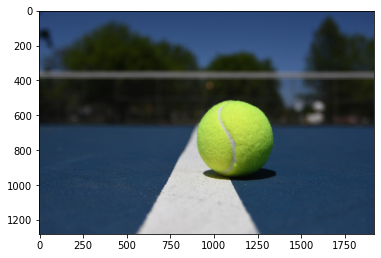

In [ ]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(6, 6)) 
plt.imshow(image)

In [ ]:
pixel_values = image.reshape((-1, 3))
pixel_values = np.float32(pixel_values)
print(pixel_values.shape)

(2457600, 3)


Performing the clustering and plotting it for better visualization

1


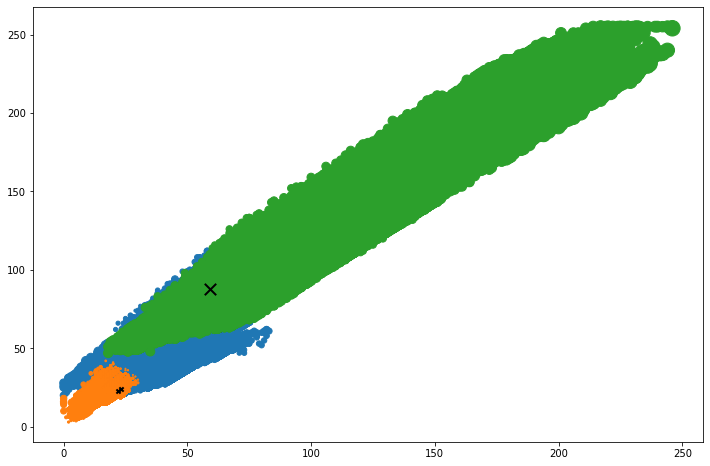

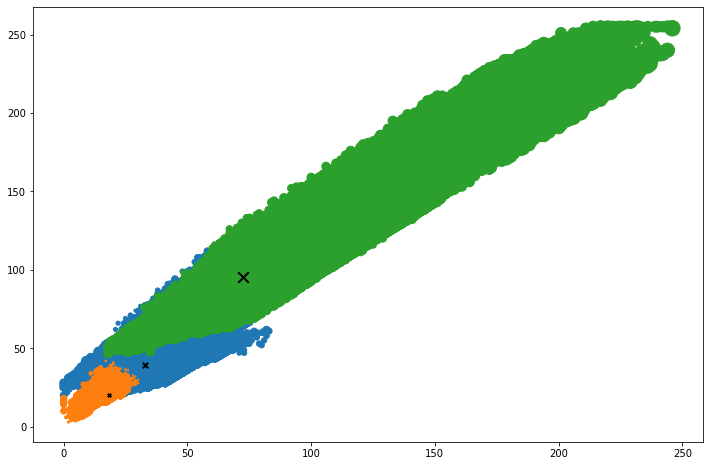

1


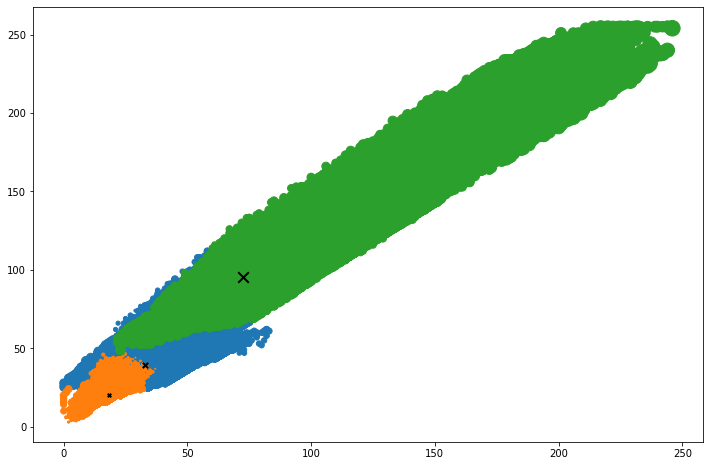

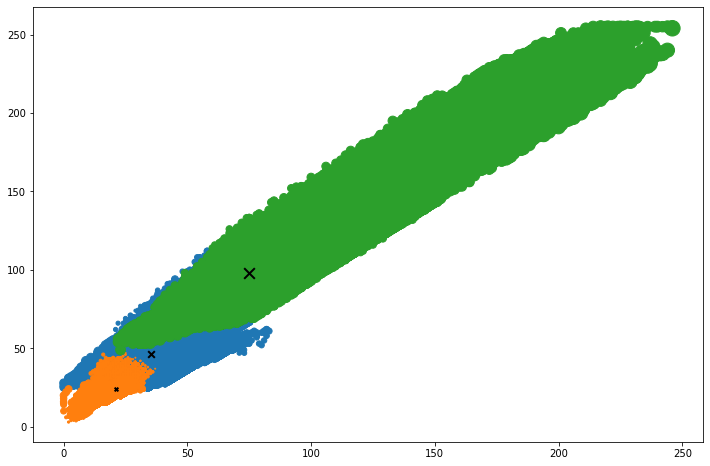

1


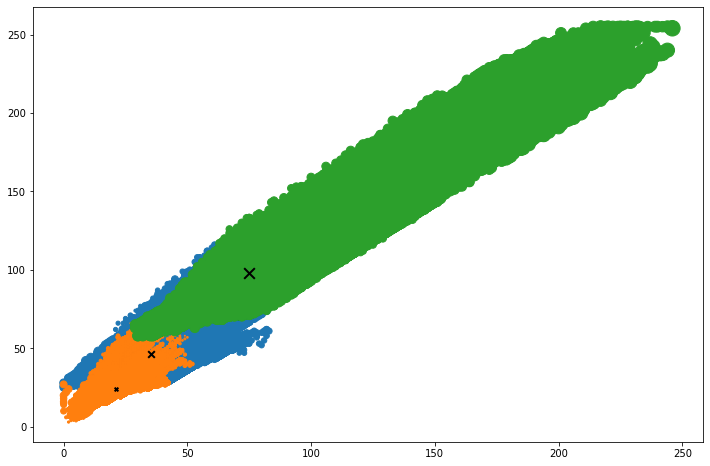

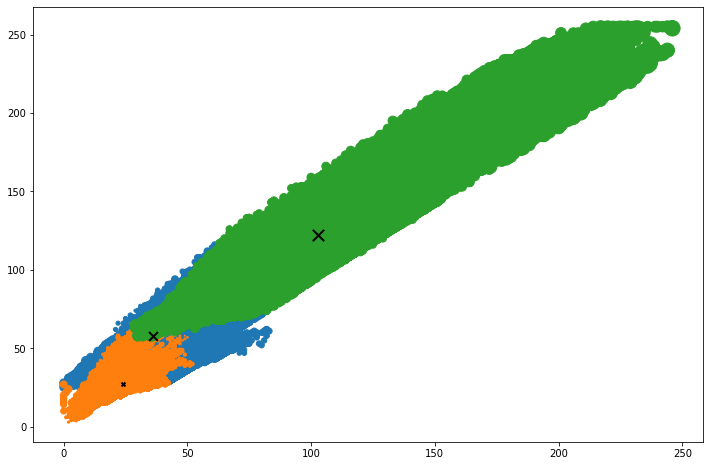

1


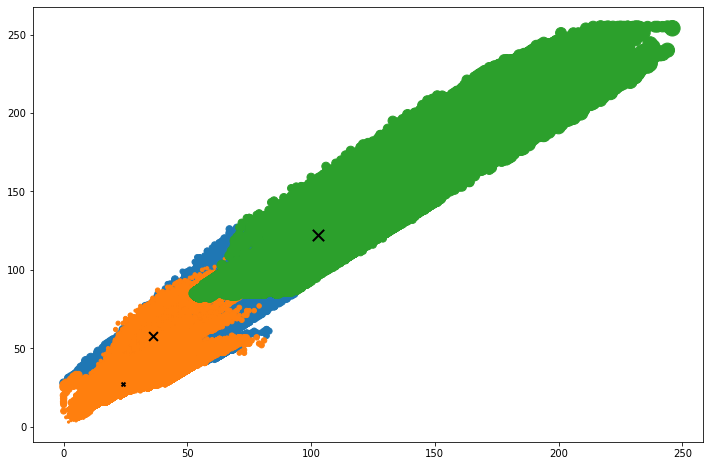

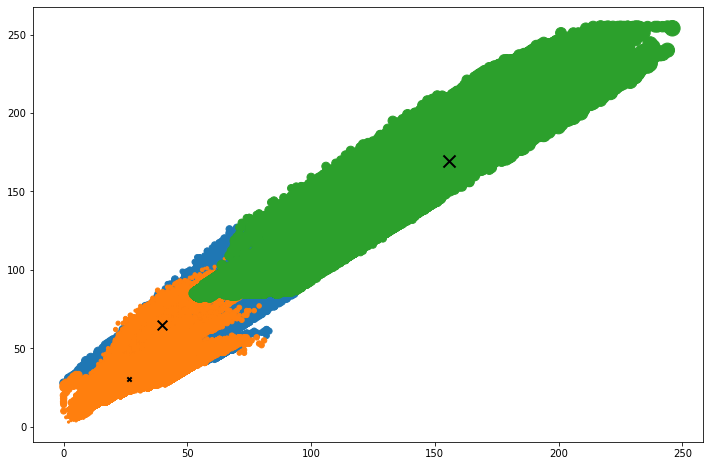

1


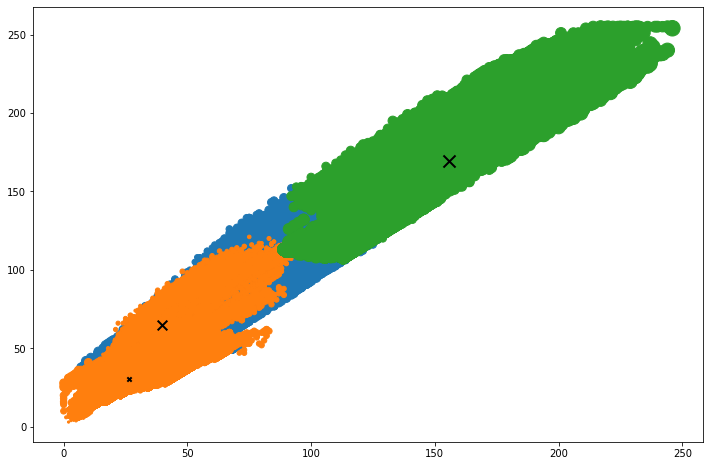

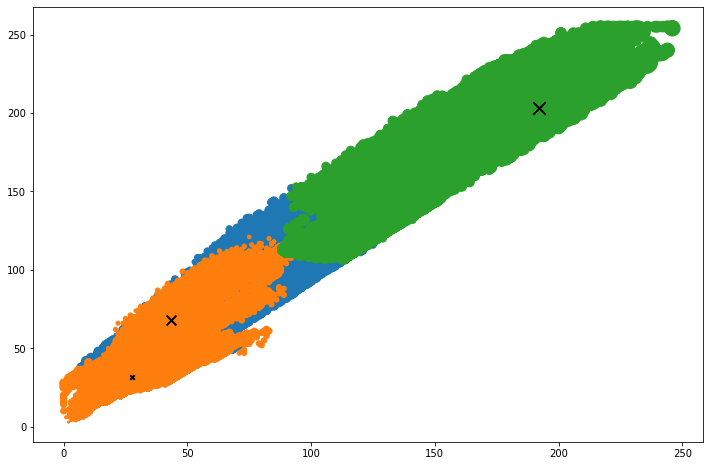

1


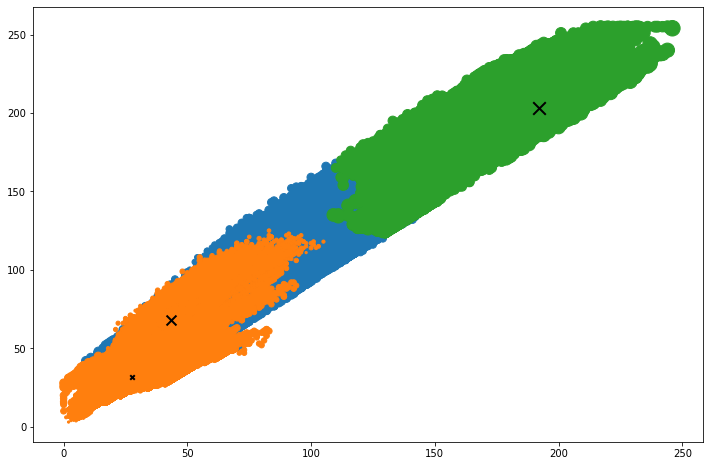

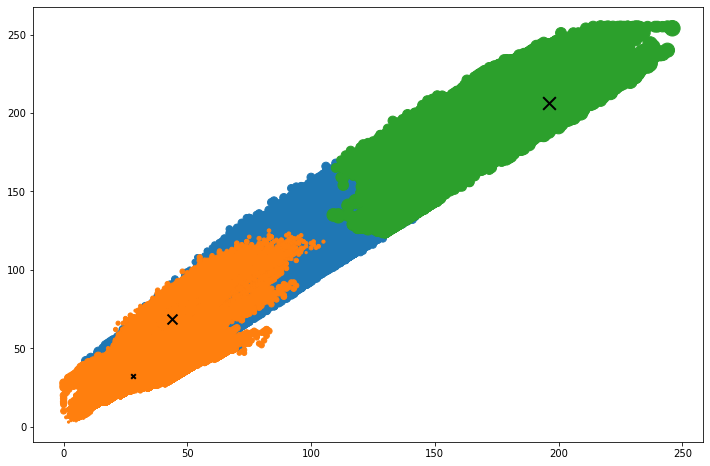

1


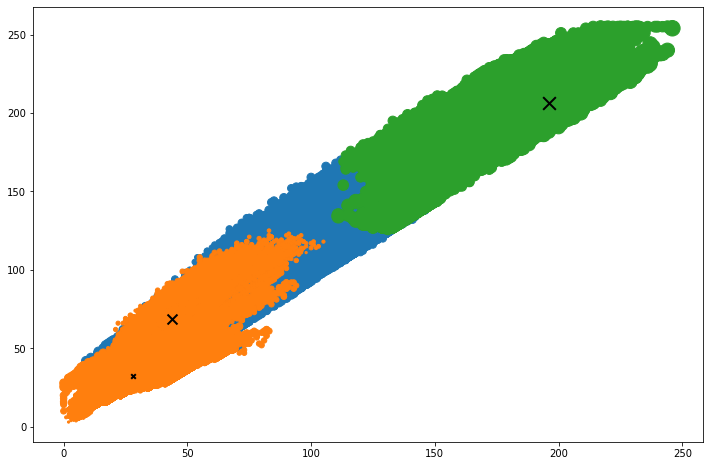

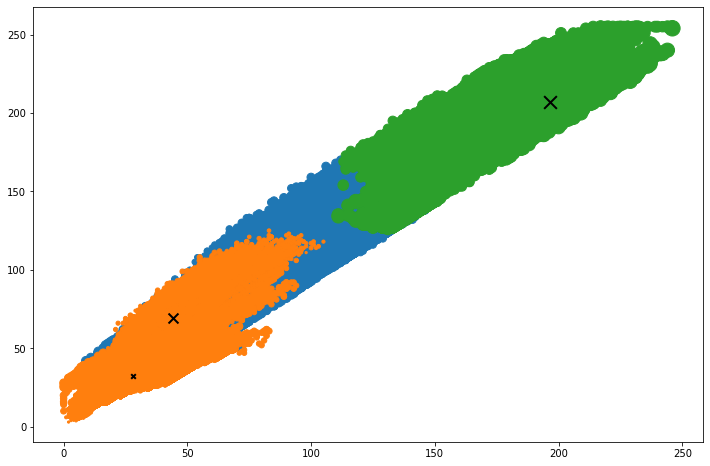

1


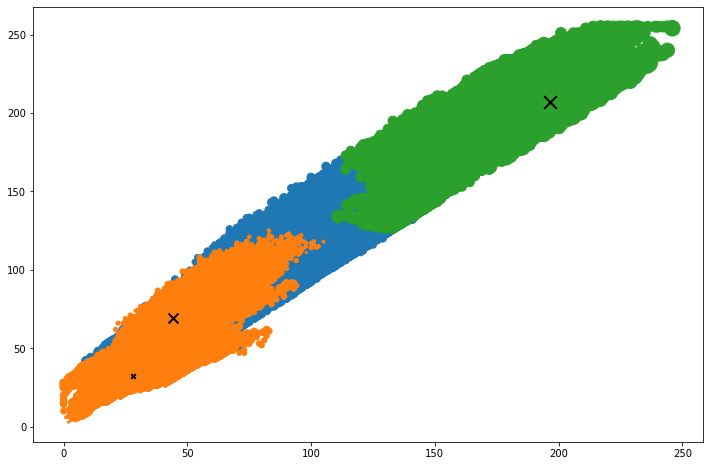

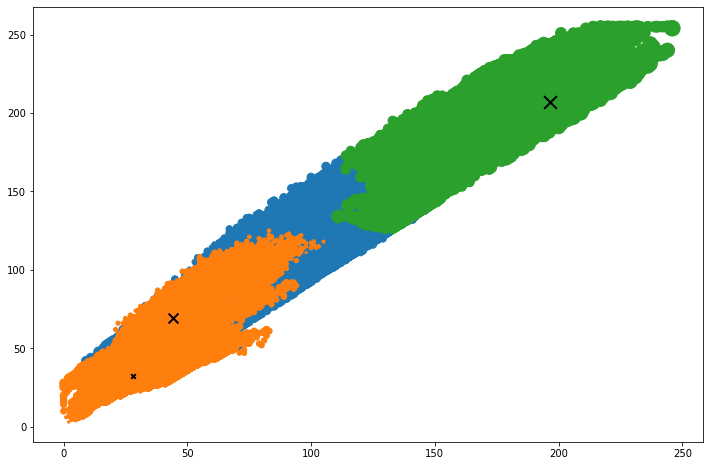

1


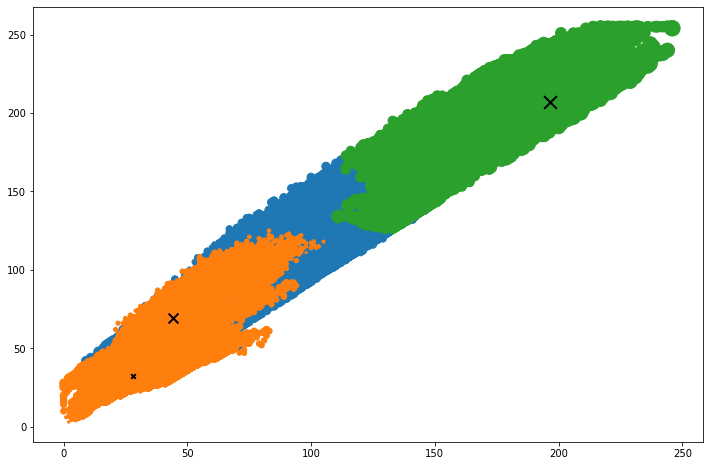

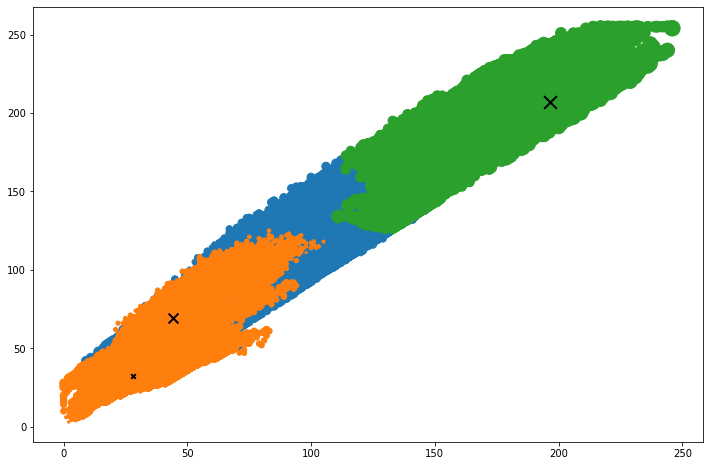

1


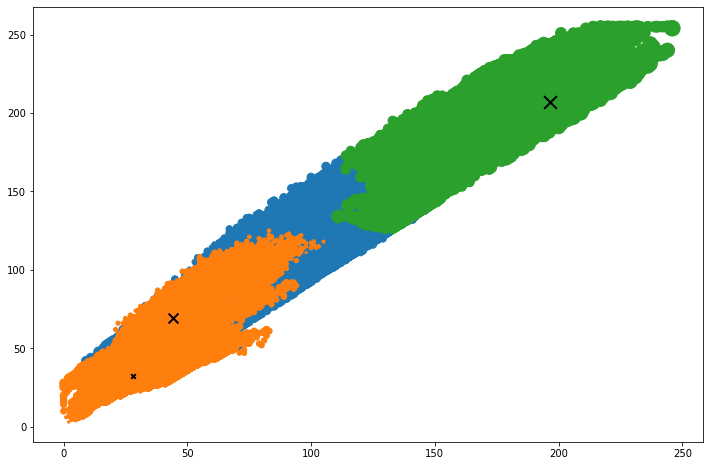

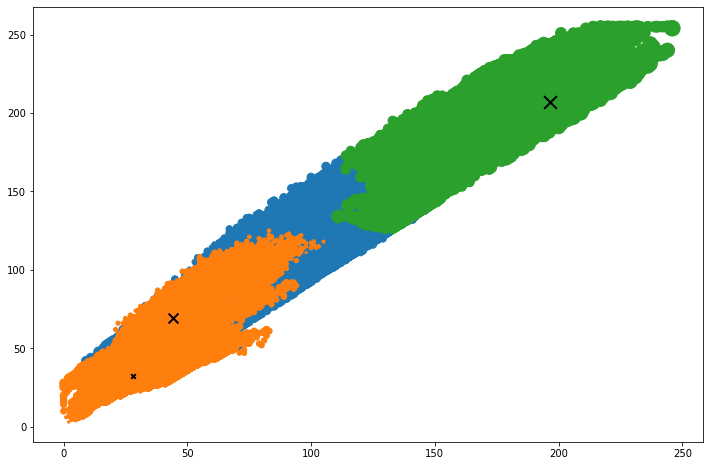

1


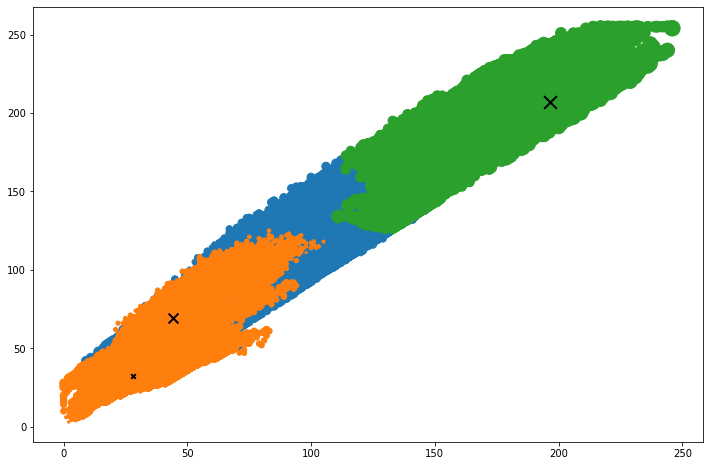

array([[ 44.13318253,  69.10855103,  98.74353027],
       [ 27.92625046,  32.54925537,  21.29880524],
       [196.59100342, 207.03218079, 161.73736572]])

In [ ]:
k = KMeans(K=3, max_iters=50,plot_steps=True)  
y_pred = k.predict(pixel_values) 
k.cent()

In [ ]:
centers = np.uint8(k.cent())
centers

array([[ 44,  69,  98],
       [ 27,  32,  21],
       [196, 207, 161]], dtype=uint8)

In [ ]:
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
y_pred = y_pred.astype(int)
np.unique(y_pred)

array([0, 1, 2])

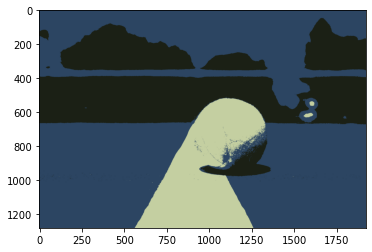

In [ ]:
labels = y_pred.flatten()
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(image.shape)
plt.imshow(segmented_image)
plt.show()

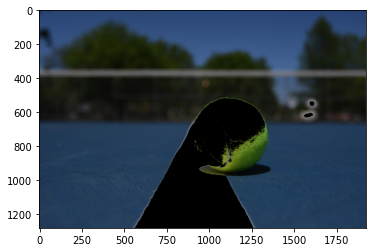

In [ ]:
masked_image = np.copy(image)
masked_image = masked_image.reshape((-1, 3))
cluster = 2
masked_image[labels == cluster] = [0, 0, 0]
masked_image = masked_image.reshape(image.shape)
plt.imshow(masked_image)
plt.show()

##**Implementation on a medical image**

Medical image segmentation, essentially the same as natural image segmentation, refers to the process of extracting the desired object (organ) from a medical image (2D or 3D).

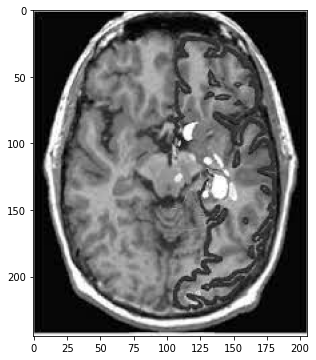

In [ ]:
#image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(6, 6)) 
plt.imshow(image)

In [ ]:
pixel_values = image.reshape((-1, 1))
pixel_values = np.float32(pixel_values)
print(pixel_values.shape)

(151410, 1)


In [ ]:
k = KMeans(K=3, max_iters=50)  
y_pred = k.predict(pixel_values) 
k.cent()

1
1
1
1
1
1


array([[231.19483948],
       [ 23.23443413],
       [128.88208008]])

In [ ]:
centers = np.uint8(k.cent())
centers

array([[231],
       [ 23],
       [128]], dtype=uint8)

In [ ]:
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
y_pred = y_pred.astype(int)
np.unique(y_pred)

array([0, 1, 2])

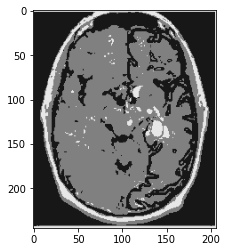

In [ ]:
labels = y_pred.flatten()
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(image.shape)
plt.imshow(segmented_image)
plt.show()

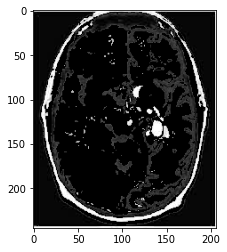

In [ ]:
masked_image = np.copy(image)
masked_image = masked_image.reshape((-1, 1))
cluster = 2
masked_image[labels == cluster] = [0]
masked_image = masked_image.reshape(image.shape)
plt.imshow(masked_image)
plt.show()

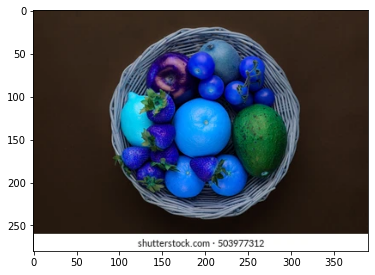

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))
class KMeans():
    def __init__(self, K=5, max_iters=100, plot_steps=False):
        self.K = K
        self.max_iters = max_iters
        self.plot_steps = plot_steps
        # list of sample indices for each cluster
        self.clusters = [[] for _ in range(self.K)]
        # the centers (mean feature vector) for each cluster
        self.centroids = []
    def predict(self, X):
        self.X = X
        self.n_samples, self.n_features = X.shape
        # initialize 
        random_sample_idxs = np.random.choice(self.n_samples, self.K, replace=False)
        self.centroids = [self.X[idx] for idx in random_sample_idxs]
        # Optimize clusters
        for _ in range(self.max_iters):
            # Assign samples to closest centroids (create clusters)
            print('1')
            self.clusters = self._create_clusters(self.centroids)
            if self.plot_steps:
                self.plot()
            # Calculate new centroids from the clusters
            centroids_old = self.centroids
            self.centroids = self._get_centroids(self.clusters)
            
            # check if clusters have changed
            if self._is_converged(centroids_old, self.centroids):
                break
            if self.plot_steps:
                self.plot()
        # Classify samples as the index of their clusters
        return self._get_cluster_labels(self.clusters)
    def _get_cluster_labels(self, clusters):
        # each sample will get the label of the cluster it was assigned to
        labels = np.empty(self.n_samples)
        for cluster_idx, cluster in enumerate(clusters):
            for sample_index in cluster:
                labels[sample_index] = cluster_idx
        return labels
    def _create_clusters(self, centroids):
        # Assign the samples to the closest centroids to create clusters
        clusters = [[] for _ in range(self.K)]
        for idx, sample in enumerate(self.X):
            centroid_idx = self._closest_centroid(sample, centroids)
            clusters[centroid_idx].append(idx)
        return clusters
    def _closest_centroid(self, sample, centroids):
        # distance of the current sample to each centroid
        distances = [euclidean_distance(sample, point) for point in centroids]
        closest_index = np.argmin(distances)
        return closest_index
    def _get_centroids(self, clusters):
        # assign mean value of clusters to centroids
        centroids = np.zeros((self.K, self.n_features))
        for cluster_idx, cluster in enumerate(clusters):
            cluster_mean = np.mean(self.X[cluster], axis=0)
            centroids[cluster_idx] = cluster_mean
        return centroids
    def _is_converged(self, centroids_old, centroids):
        # distances between each old and new centroids, fol all centroids
        distances = [euclidean_distance(centroids_old[i], centroids[i]) for i in range(self.K)]
        return sum(distances) == 0
    def plot(self):
        fig, ax = plt.subplots(figsize=(12, 8))
        for i, index in enumerate(self.clusters):
            point = self.X[index].T
            ax.scatter(*point)
        for point in self.centroids:
            ax.scatter(*point, marker="x", color='black', linewidth=2)
        plt.show()
    def cent(self):
        return self.centroids
import cv2
from google.colab.patches import cv2_imshow
image = cv2.imread("/content/drive/MyDrive/fruits.webp")
plt.figure(figsize=(6, 6))
plt.imshow(image)

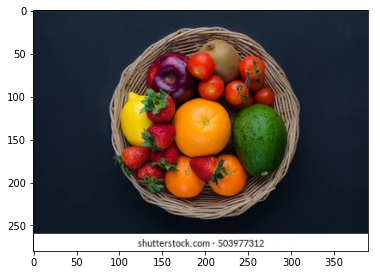

In [ ]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(6, 6)) 
plt.imshow(image)

In [ ]:
pixel_values = image.reshape((-1, 3))
pixel_values = np.float32(pixel_values)
print(pixel_values.shape)

(109200, 3)


1


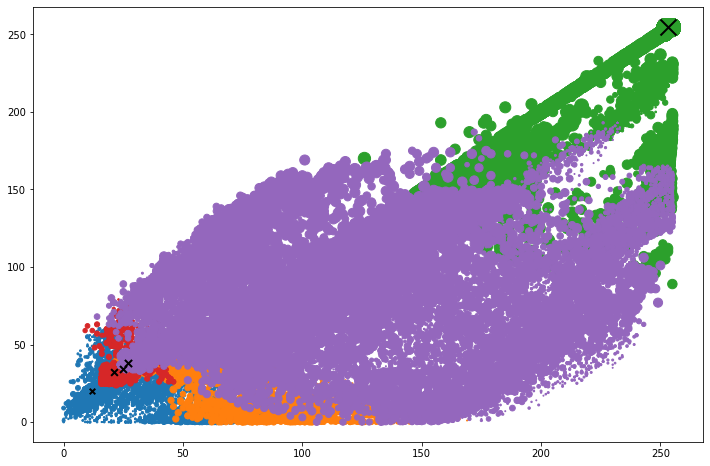

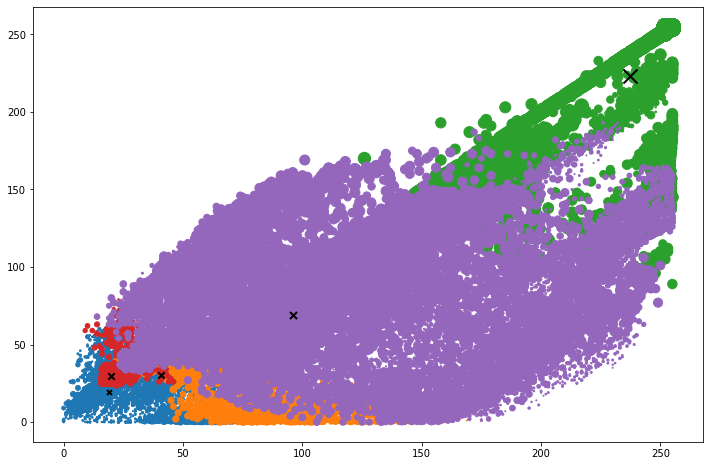

1


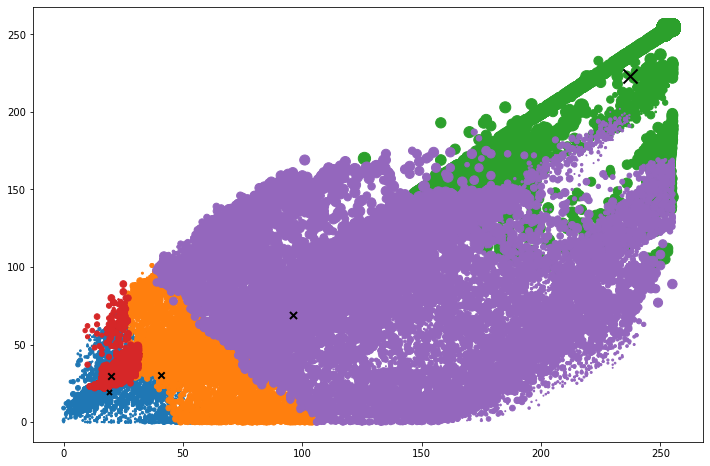

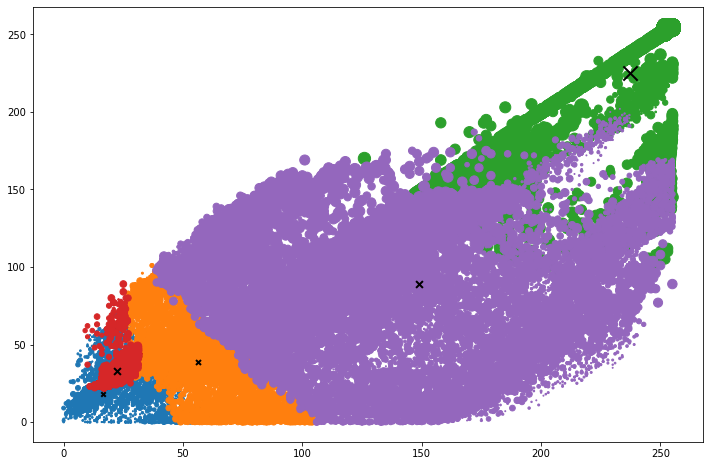

1


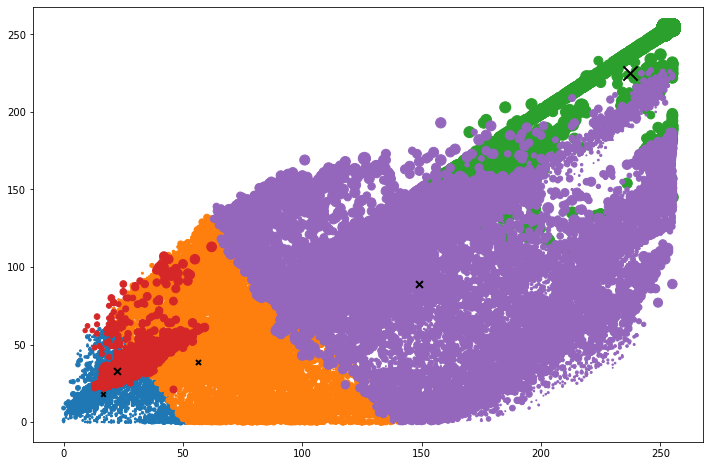

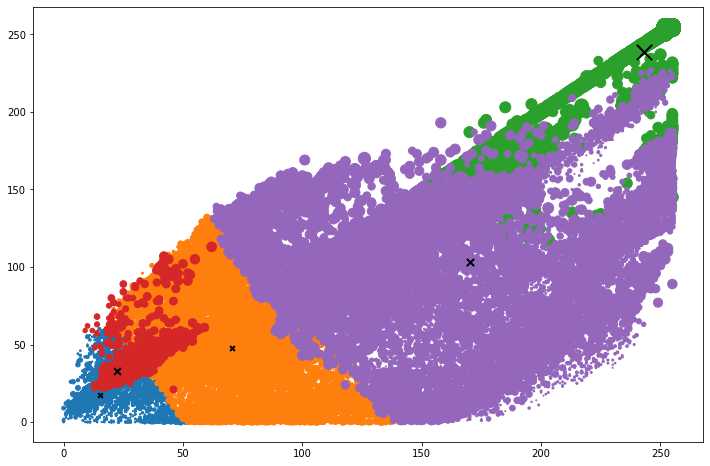

1


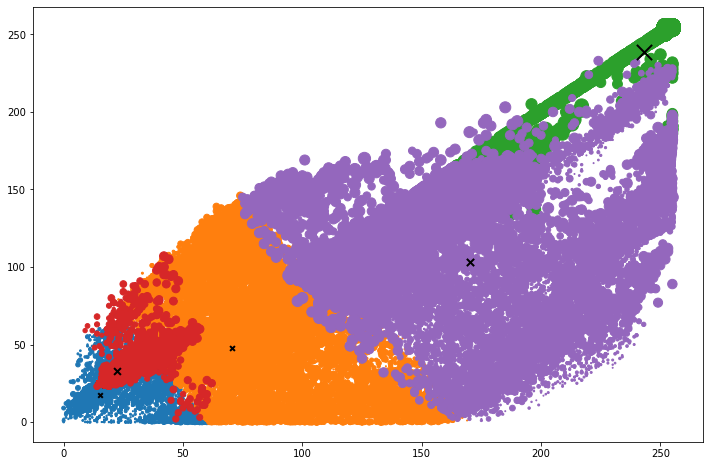

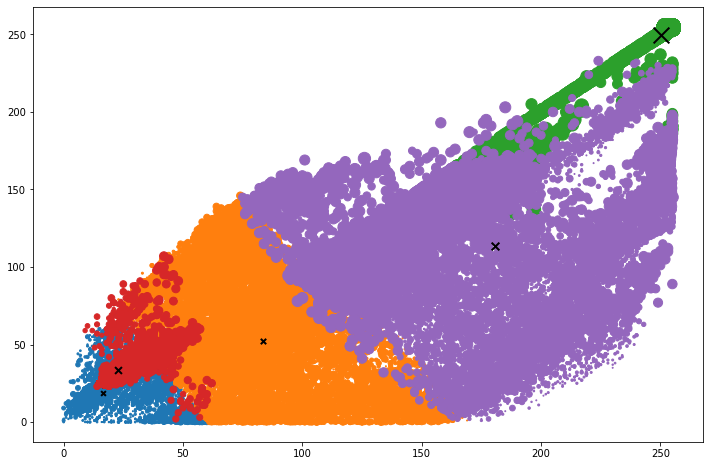

1


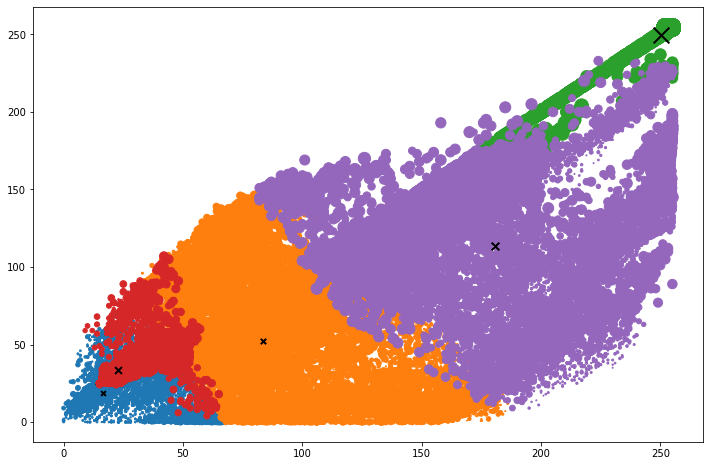

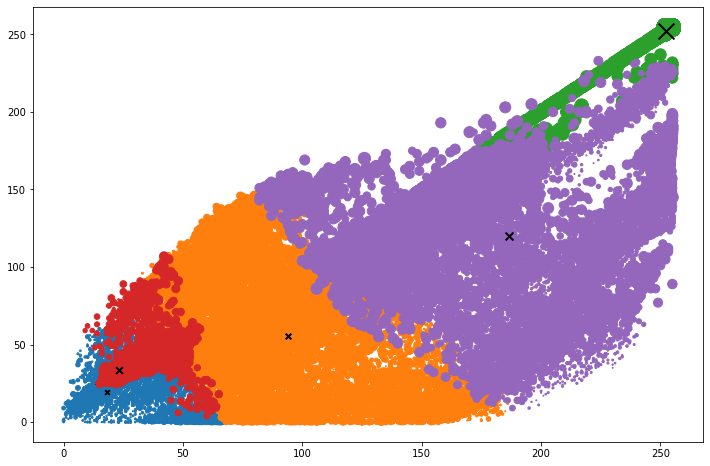

1


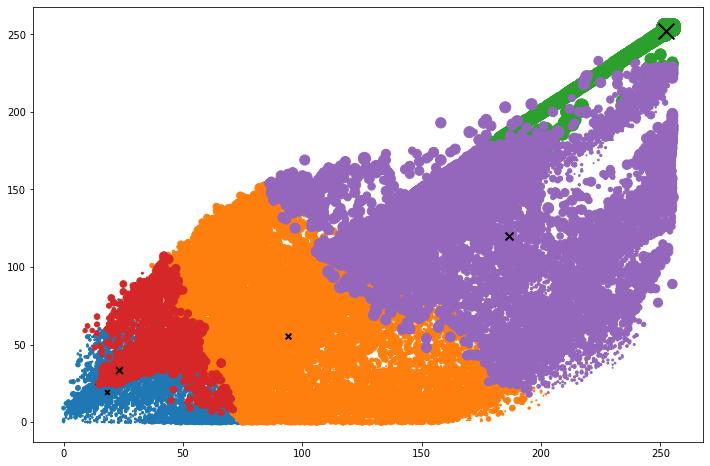

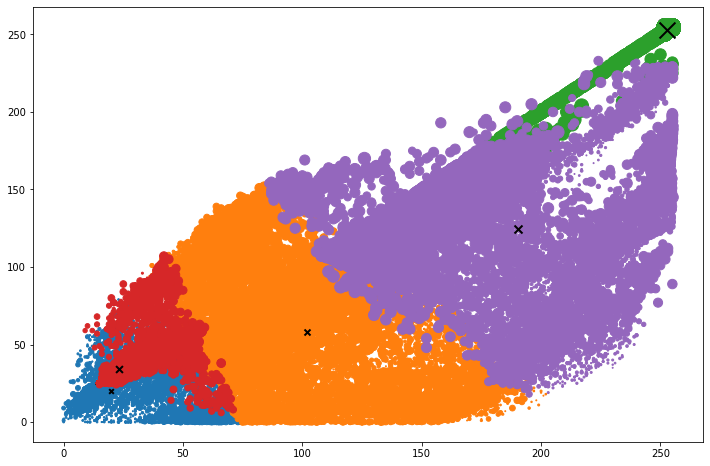

1


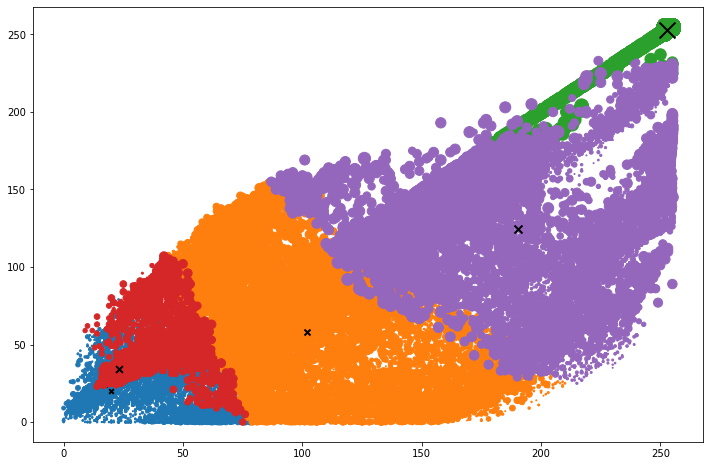

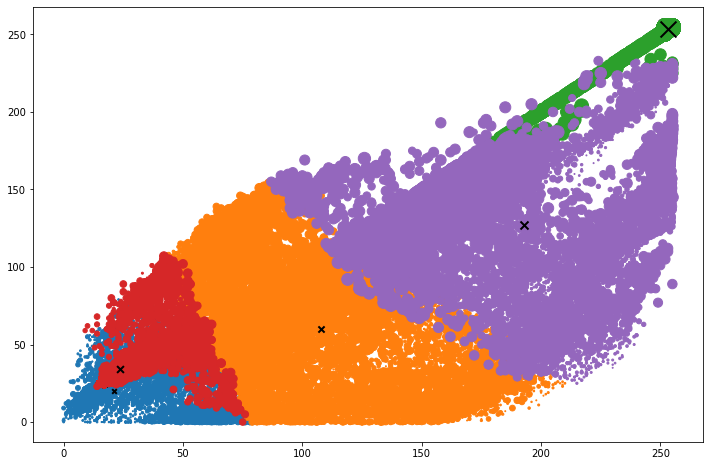

1


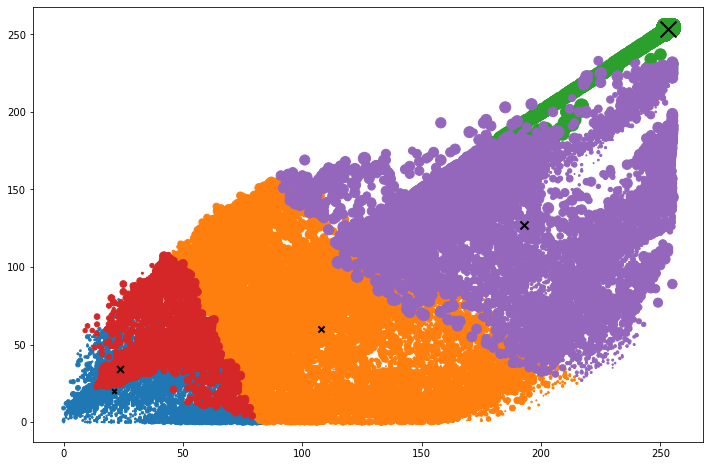

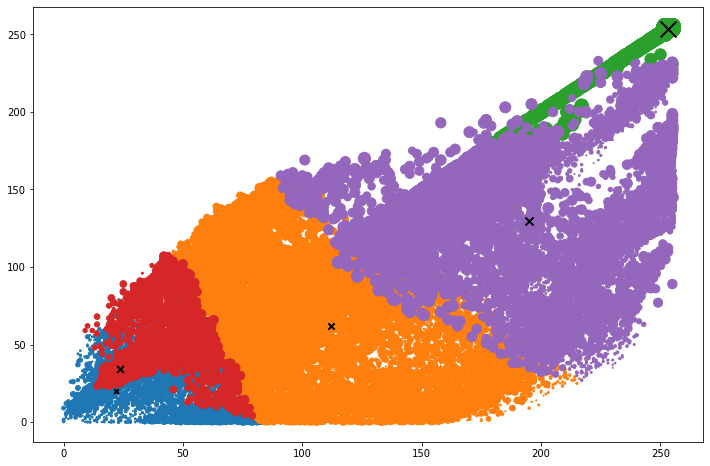

1


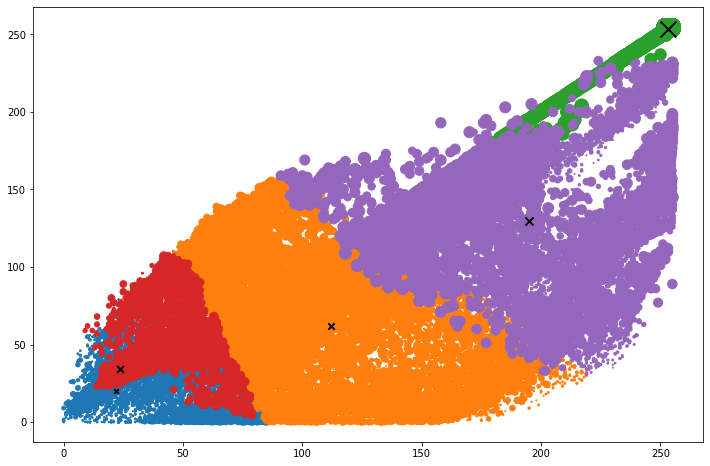

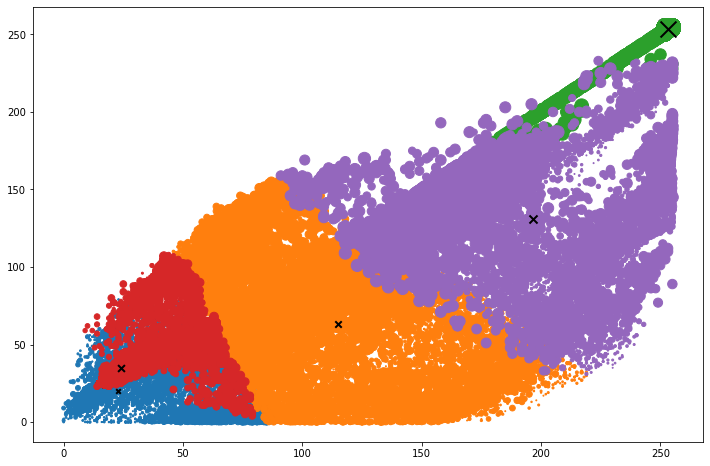

1


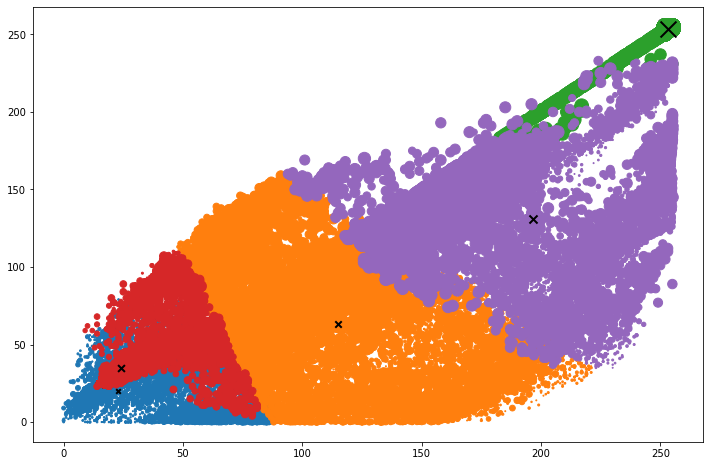

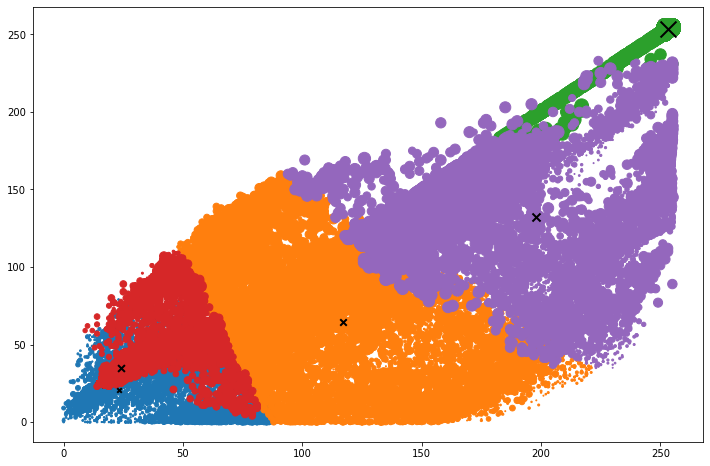

1


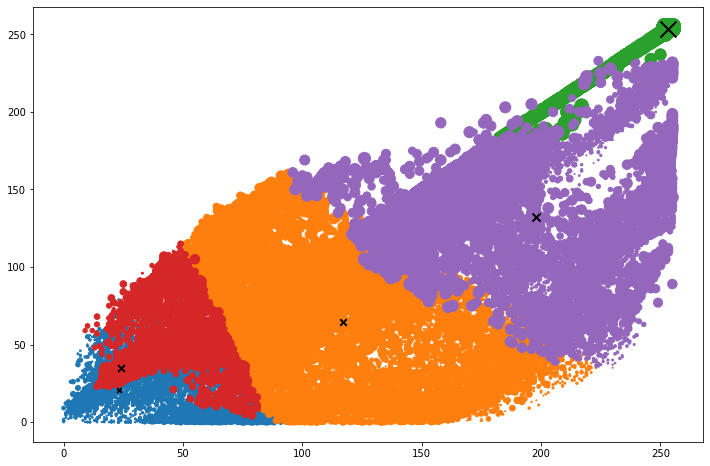

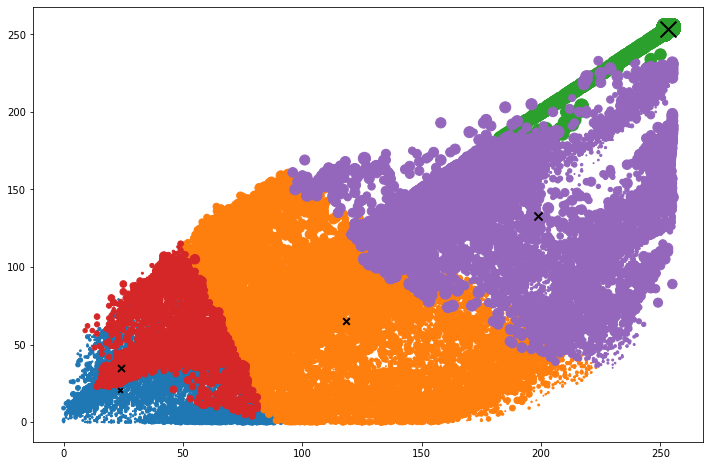

1


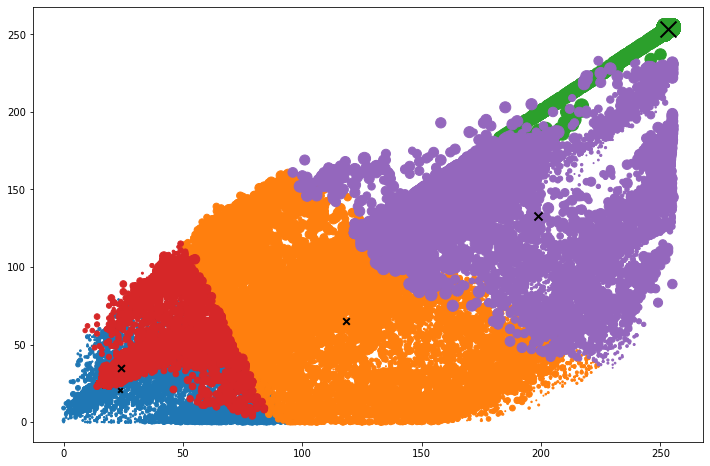

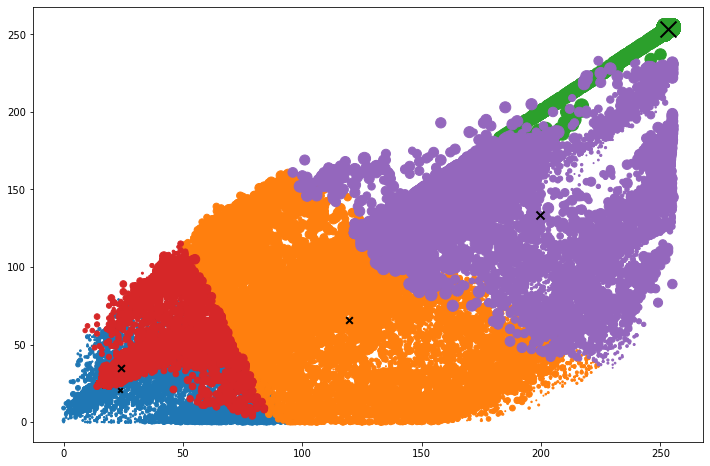

1


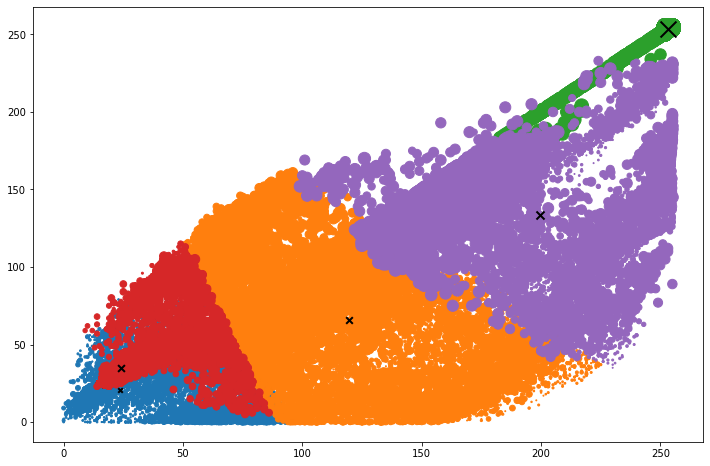

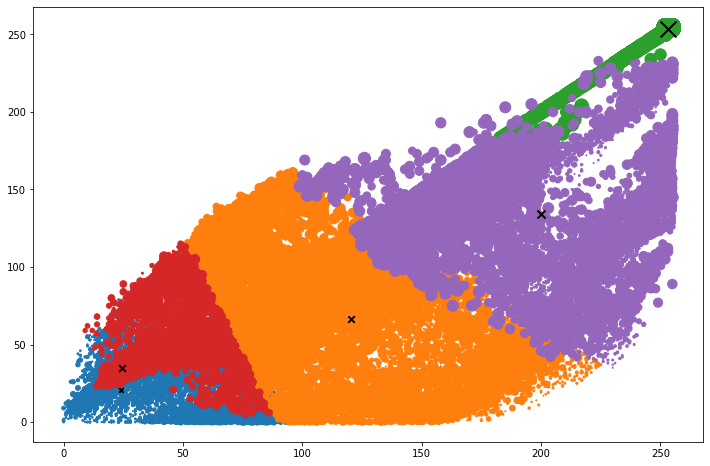

1


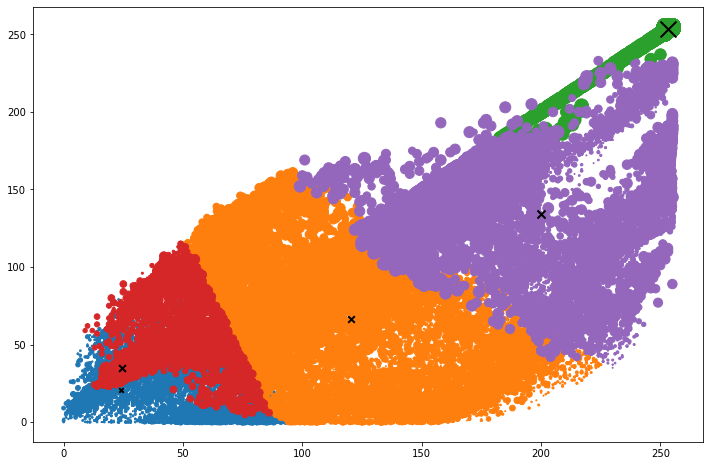

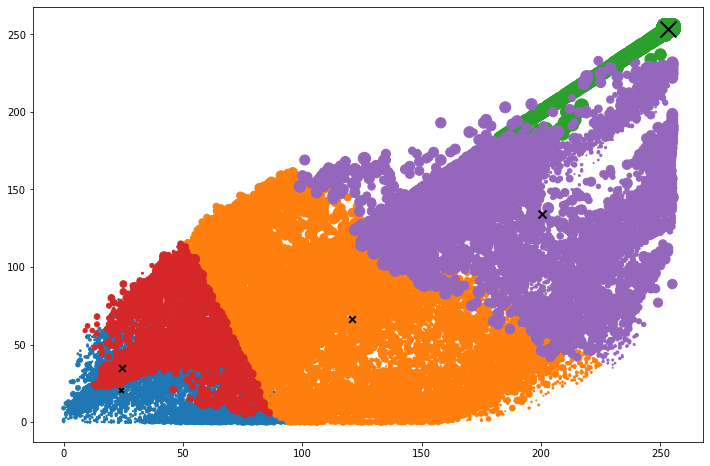

1


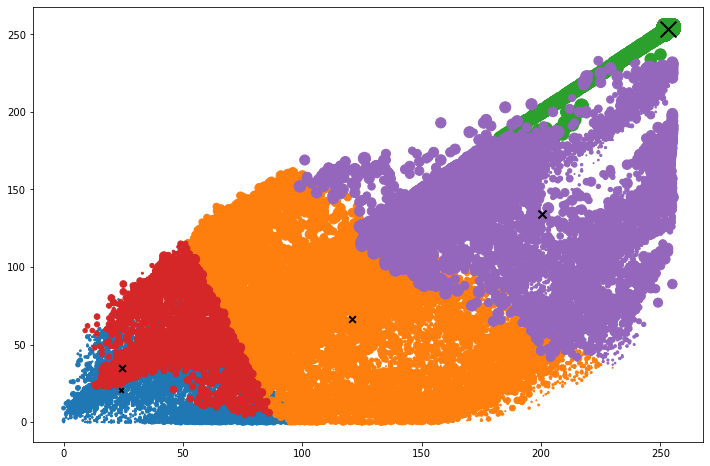

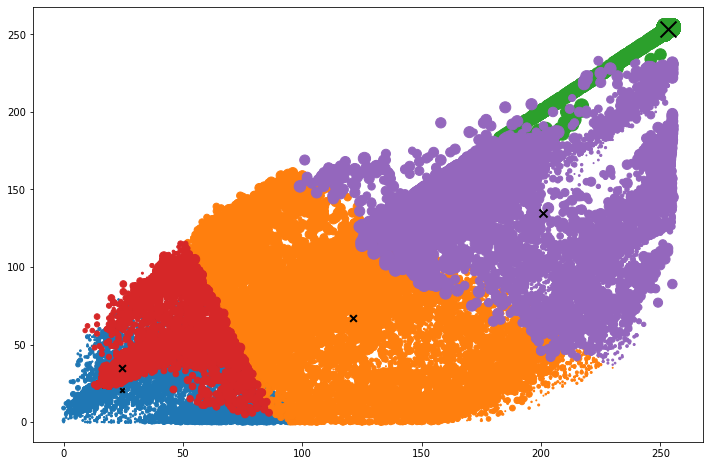

1


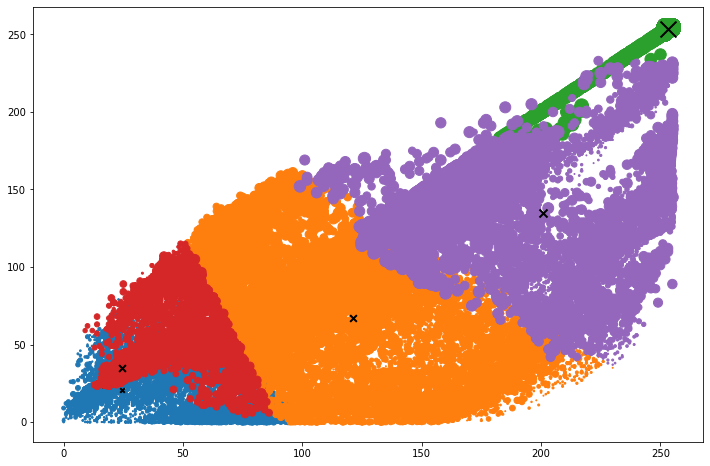

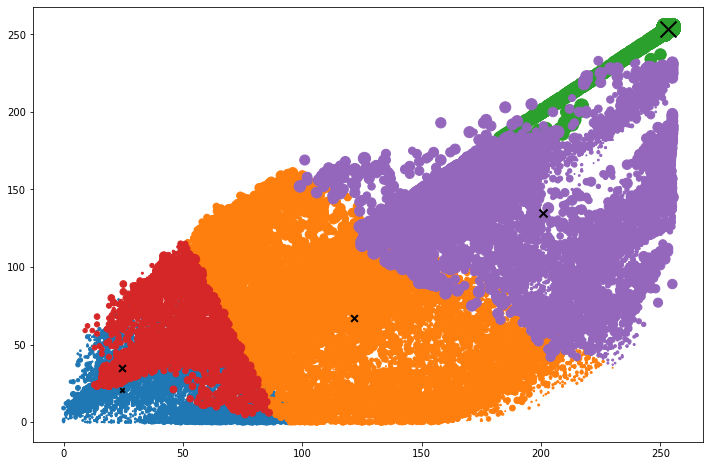

1


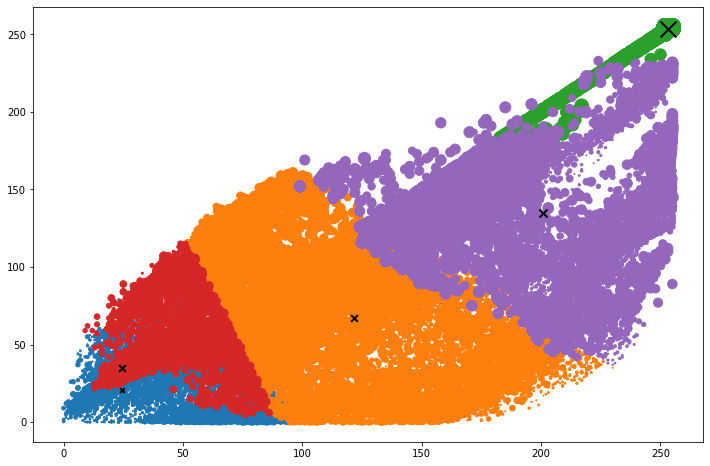

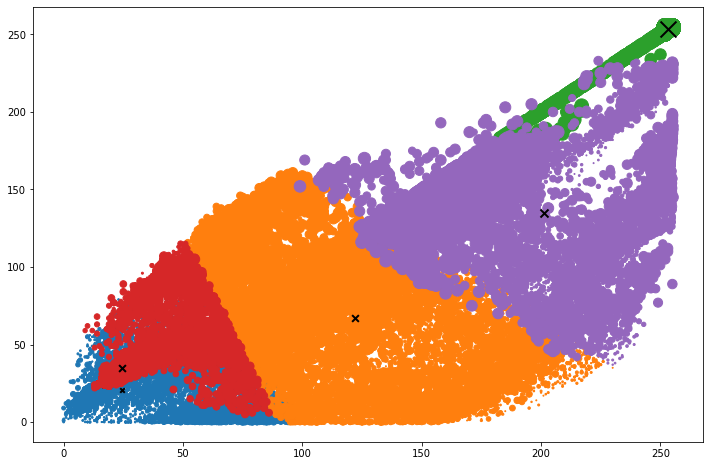

1


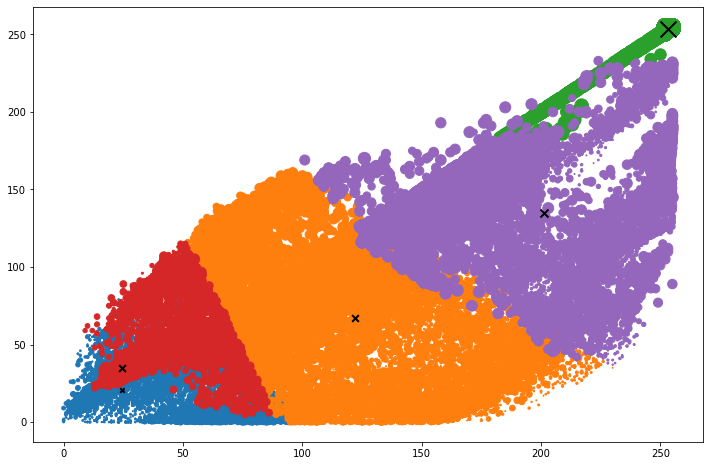

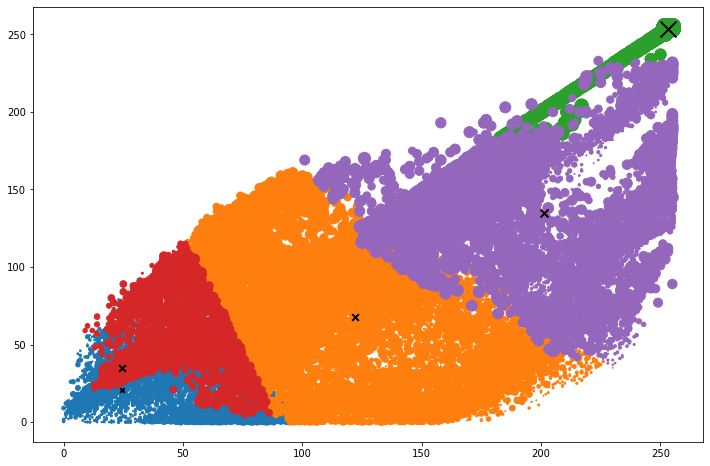

1


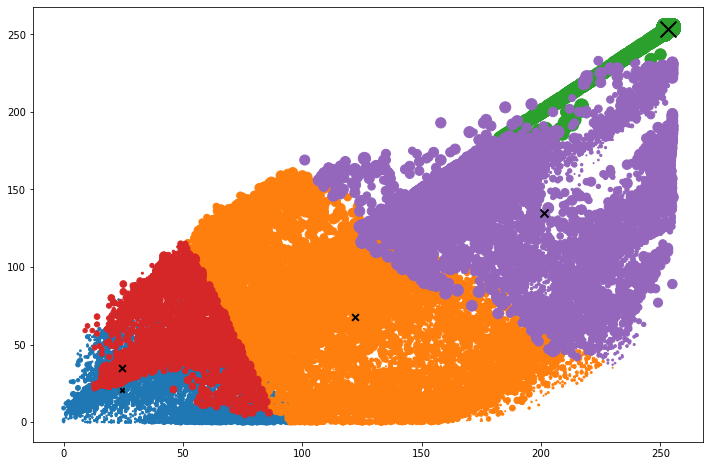

In [ ]:
k = KMeans(K=5, max_iters=50,plot_steps=True)  
y_pred = k.predict(pixel_values) 
k.cent()

In [ ]:
centers = np.uint8(k.cent())
centers

array([[ 24,  20,  20],
       [122,  68,  46],
       [253, 253, 253],
       [ 24,  35,  46],
       [201, 135,  63]], dtype=uint8)

In [ ]:
y_pred = y_pred.astype(int)
np.unique(y_pred)

array([0, 1, 2, 3, 4])

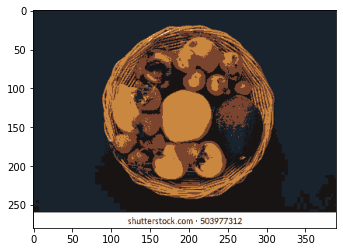

In [ ]:
labels = y_pred.flatten()
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(image.shape)
plt.imshow(segmented_image)
plt.show()

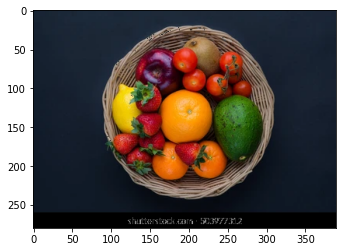

In [ ]:
masked_image = np.copy(image)
masked_image = masked_image.reshape((-1, 3))
cluster = 2
masked_image[labels == cluster] = [0]
masked_image = masked_image.reshape(image.shape)
plt.imshow(masked_image)
plt.show()